In [10]:
# 此代码用来测试task1的dataloader
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torchvision.transforms as trans
from dataset_functions.task1_dataset import OCTDataset



In [11]:
# 设置参数
image_file = '../datasets/Train/Image'
gt_file = '../datasets/Train/Layer_Masks'
image_size = 256 # 统一输入图像尺寸
val_ratio = 0.2 # 验证/训练图像划分比例
batch_size = 8


filelists = os.listdir(image_file)
train_filelists, val_filelists = train_test_split(filelists, test_size = val_ratio,random_state = 42)
print("Total Nums: {}, train: {}, val: {}".format(len(filelists), len(train_filelists), len(val_filelists)))
# images = os.listdir(image_file)
# print(images)
# filelist = [images[i] for i in range(len(images))]
# print(filelist)

Total Nums: 100, train: 80, val: 20


In [41]:
# 输入：image_path为数据集路径，filelists为此次调用OCTDataset的图像列表（训练或者验证的图像列表），gt_path为分割的ground truth
class OCTDataset(Dataset):
    def __init__(self, image_transforms, image_path, filelists=None, gt_path=None, mode='train'):
        super(OCTDataset, self).__init__()
        self.image_transforms = image_transforms
        self.image_path = image_path
        self.filelists = filelists
        if self.filelists == None:
            self.filelists = os.listdir(self.image_path)
        self.gt_path = gt_path
        self.mode = mode

    def __getitem__(self, idx):
        img_index = self.filelists[idx]
        img_path = os.path.join(self.image_path, img_index)
        img = cv2.imread(img_path)
        h, w, c = img.shape
        if self.mode == 'train' or self.mode == 'val':
            gt_img = cv2.imread(os.path.join(self.gt_path, img_index))
            
            # 像素值为0的是RNFL(类别 0)，像素值为80的是GCIPL(类别 1)，像素值为160的是脉络膜(类别 2)，像素值为255的是其他（类别3）
            gt_img[gt_img == 80] = 1
            gt_img[gt_img == 160] = 2
            gt_img[gt_img == 255] = 3
            
            gt_img = cv2.resize(gt_img, (256, 256))
            gt_img = torch.from_numpy(gt_img)
            gt_img = gt_img[:,:,1] # 取一个通道

            
                # gt_img = self.image_transforms(gt_img)
                # gt_img = torch.squeeze(gt_img, 0)

        # img = cv2.resize(img, (self.image_size, self.image_size))
        img = img/255

        if self.image_transforms is not None:
                img = self.image_transforms(img)

        if self.mode == 'train' or self.mode == 'val':
            return img.float(), gt_img.long()
        if self.mode == 'test':
            return img.float(), img_index, h, w

    def __len__(self):
        return len(self.filelists)

img_val_transforms = trans.Compose([
                                    trans.ToTensor(), 
                                    trans.Resize((image_size, image_size))])
val_dataset = OCTDataset(image_transforms=img_val_transforms, image_path=image_file, filelists=val_filelists, gt_path=gt_file, mode='val')
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

img, gt_img = val_dataset.__getitem__(0)
print(gt_img)

# iter = 0
# iters = 10
# while iter < iters:
#     for _, data in enumerate(val_loader):
#         iter+=1
#         img, gt_img = data
#         # print(np.array(label).shape)
#         print(img.shape)
#         print(gt_img.shape)     

# for img, idx in val_dataset:
#     print(img.shape)      



tensor([[3, 3, 3,  ..., 3, 3, 3],
        [3, 3, 3,  ..., 3, 3, 3],
        [3, 3, 3,  ..., 3, 3, 3],
        ...,
        [3, 3, 3,  ..., 3, 3, 3],
        [3, 3, 3,  ..., 3, 3, 3],
        [3, 3, 3,  ..., 3, 3, 3]])


(256, 256)


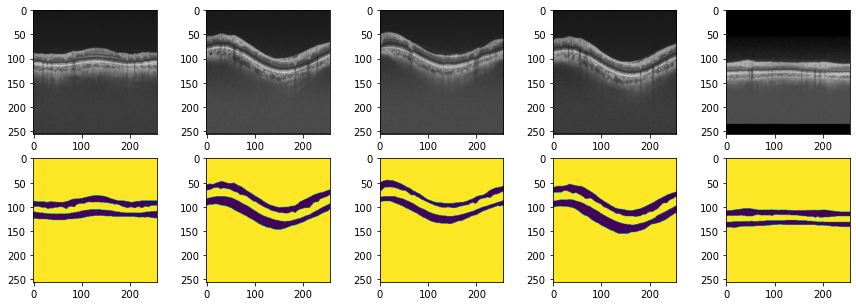

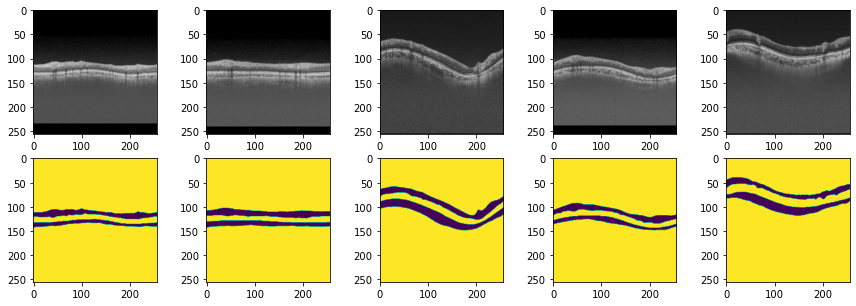

In [28]:
# 显示图像，测试OCTDataset
_train = OCTDataset(image_size=image_size, 
                    image_path=image_file, 
                    filelists=train_filelists, 
                    gt_path=gt_file,
                    mode='train')
_val = OCTDataset(image_size=image_size, 
                    image_path=image_file, 
                    filelists=val_filelists, 
                    gt_path=gt_file,
                    mode='val')

plt.figure(figsize=(15,5))
for i in range(5):
    img, label = _train.__getitem__(i)
    plt.subplot(2,5,i+1)
    plt.imshow(img)

    plt.subplot(2,5,i+6)
    plt.imshow(label)

plt.figure(figsize=(15,5))
for i in range(5):
    img, label = _val.__getitem__(i)
    plt.subplot(2,5,i+1)
    plt.imshow(img)

    plt.subplot(2,5,i+6)
    plt.imshow(label)

img, label = _val.__getitem__(0)
mask = (label == 255)
# label = torch.from_numpy(label)
# label = torch.unsqueeze(label, 0)

# print(img.shape)
print(label.shape)
# dims = (0)
# print(dims)
# a = torch.sum(label, dims)
# print(a)

In [ ]:
# class OCTDataset(Dataset):
#     def __init__(self, image_size, image_path, filelists=None, gt_path=None, mode='train'):
#         super(OCTDataset, self).__init__()
#         self.image_size = image_size
#         self.image_path = image_path
#         self.filelists = filelists
#         if self.filelists == None:
#             self.filelists = os.listdir(self.image_path)
#         self.gt_path = gt_path
#         self.mode = mode

#     def __getitem__(self, idx):
#         img_index = self.filelists[idx]
#         img_path = os.path.join(self.image_path, img_index)
#         img = cv2.imread(img_path)
#         h, w, c = img.shape
#         if self.mode == 'train' or self.mode == 'val':
#             gt_img = cv2.imread(os.path.join(self.gt_path, img_index))
            
#             # 像素值为0的是RNFL(类别 0)，像素值为80的是GCIPL(类别 1)，像素值为160的是脉络膜(类别 2)，像素值为255的是其他（类别3）
#             gt_img[gt_img == 80] = 1
#             gt_img[gt_img == 160] = 2
#             gt_img[gt_img == 255] == 3
#             gt_img = cv2.resize(gt_img, (self.image_size, self.image_size))
#             gt_img = gt_img[:,:,1]

#         img = cv2.resize(img, (self.image_size, self.image_size))
#         img = img/255

#         if self.mode == 'train' or self.mode == 'val':
#             return img, gt_img
#         if self.mode == 'test':
#             return img, img_index

#     def __len__(self):
#         return len(self.filelists)